<a href="https://colab.research.google.com/github/HUFS-Programming-2022/Hyeryeong_202103342/blob/main/week_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고급파이썬프로그래밍_6주차(0408)

# CH07

## 1. NLTK Corpus

### 1-1. Brown
- 브라운 대학에서 만듦
- categories()

### 1-2. ConditionalFreqDist()
- 조건이 붙은 fdist
- 컴프리핸션의 형태와 비슷함

In [2]:
# nltk brown, inaugural
import nltk
nltk. download(['brown','inaugural']) 

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [3]:
brown = nltk.corpus.brown
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()   # brown에 담긴 장르(예제)명 불러옴
    for word in brown.words(categories = genre)    # 각 장르별 카테고리에 담긴 word 불러옴
)   # 뒤에서 변수 정확히 언급해 주어야 함

genres = brown.categories()    # brown에 담긴 장르를 변수에 저장
modals = ['can', 'could', 'will', 'would', 'may', 'might']   # modals 리스트 지정
cfd1.tabulate(conditional = genres, samples = modals)   

                  can could  will would   may might 
      adventure    46   151    50   191     5    58 
 belles_lettres   246   213   236   392   207   113 
      editorial   121    56   233   180    74    39 
        fiction    37   166    52   287     8    44 
     government   117    38   244   120   153    13 
        hobbies   268    58   264    78   131    22 
          humor    16    30    13    56     8     8 
        learned   365   159   340   319   324   128 
           lore   170   141   175   186   165    49 
        mystery    42   141    20   186    13    57 
           news    93    86   389   244    66    38 
       religion    82    59    71    68    78    12 
        reviews    45    40    58    47    45    26 
        romance    74   193    43   244    11    51 
science_fiction    16    49    16    79     4    12 


In [8]:
brown.categories()[:5]    # brown 카테고리에 무엇이 담겨 있는지 확인

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government']

In [7]:
# genre 별로 modal의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals)
    for genre in brown.categories()    # modal과 genre의 위치 바꿀 수 있음
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']    
    
    for word in brown.words(categories = genre)
         if word.lower() == modals    # candidate  # if 써서 word랑 modal 연결 시킴
)
cfd2.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


In [4]:
beverb = nltk.ConditionalFreqDist(
    (genre, be_verb)
    for genre in brown.categories()
    for be_verb in ['be', 'is', 'am', 'are', 'was', 'were']

    for verb in brown.words(categories = genre)
         if verb.lower() == be_verb
)
beverb.tabulate()

                  am  are   be   is  was were 
      adventure    9   53  188  102  919  251 
 belles_lettres   58  649  843 1816 1470  525 
      editorial   19  298  422  752  310  109 
        fiction   22   52  256  151 1091  240 
     government   18  416  603  657  223  126 
        hobbies    5  532  524  971  265  106 
          humor    8   44   79  121  276   84 
        learned   13  993 1363 2412 1115  633 
           lore   19  482  570 1016  961  349 
        mystery    7   52  234  120  828  157 
           news   14  330  526  733  717  252 
       religion   15  194  243  537  214   92 
        reviews    3  195  154  513  227   87 
        romance   20   78  292  158  999  214 
science_fiction    7   26   80   50  200   59 


In [5]:
!pip install matplotlib

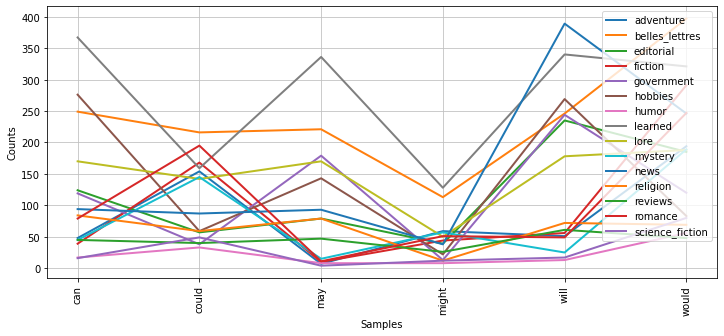

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5))
cfd2.plot()

###  1-3. Inaugural
- 연설문 데이터

In [10]:
inaugural = nltk.corpus.inaugural

In [11]:
inaugural.fileids()[:5]  # 연도-이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

In [12]:
# inaugural애서 america, citizen의 빈도수, 연도별로 
# cfd2 코드 참고
cfd3 = nltk.ConditionalFreqDist(
    # (genre, modals) # modals, genre
    (target_word, fileid)   
    for fileid in inaugural.fileids()
    # for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    for target_word in ['america', 'citizen'] 

    # for word in brown.words(fileids = fileid)
    for word in inaugural.words(fileids = fileid)
          # if word.lower() == modal  # candidate
          if word.lower().startswith(target_word)
)

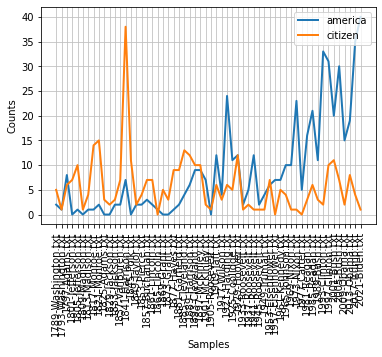

In [13]:
cfd3.plot()

## 2. Tuple & List
### 1) 생성하기
- 튜플은 다양한 방법으로 생성 가능(약간 비일관적)
- 한 요소 이상의 튜플을 만들기 위해서는 각 요소 뒤에 ',' 붙임
- 튜플 정의할 때 괄호 필요 없음 but 콤마를 다른 용도로 사용하려면 괄호 필요

In [14]:
# 빈 튜플 만들기
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

- 요소가 2개 이상일 때 -> 마지막에는 콤마 붙이지 X

In [15]:
listA = ['a', 'b']

tupleA = 'a', 'b'  # 괄호 있어도 되고, 없어도 됨. -> 괄호 없이 쓰는 것이 더 효율적
tupleA = ('a','b')

listA , tupleA

(['a', 'b'], ('a', 'b'))

- 요소가 1개일 때 -> 콤마 생략하면 문자열이 됨

In [16]:
listA = ['a']

tupleA = ('a',)  # comma
tupleA = 'a',

tupleA, listA

(('a',), ['a'])

In [17]:
# 콤마 생략하여 문자열이 된 경우
ex = 'a'
type(ex)

str

In [18]:
# 콤마를 다른 용도(ex.문자열)로 사용하는 경우
movie = 'disney',
print(type(movie), type('disney',), type(('disney',)))

<class 'tuple'> <class 'str'> <class 'tuple'>


### 2) 여러 변수 할당하기
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
   - a = [1, 2, 3, 4]
   - 리스트, 튜플이 담긴 변수 자체가 튜플, 리스트 
- unpacking: 여러 변수에 하나의 데이터를 할당하는 것. 그것을 각각의 변수로 변환하는 것
   - a, b, c = [1, 2, 3]
   - a에 1, b에 2, c에 3
   - 한 문장에서 값을 교환하기 위해 임시변수를 사용하지 않고 튜플 사용 가능

In [19]:
name = 'cho'
a, b, c = name
a, b, c  # unpacking

('c', 'h', 'o')

In [20]:
# unpacking 사용하여 교환
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd'로 바꾸려 함

temp1 = pwd
temp2 = userId
pwd = temp2
userId = temp1  # 중간에 한 번 바뀜

# 튜플 사용하면
pwd, userId = userId, pwd
pwd, userId  # 처음으로 돌아옴

('abcd', 'hello')

### 3) 연산
- 결합하기 +
- 항목 복제하기 *
- 비교하기

In [21]:
# 결합하기
('a',) + ('b', 'c')

('a', 'b', 'c')

In [22]:
# 항목 복제하기
('a','b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [23]:
a = 1, 2
b = 1, 3

a, b

((1, 2), (1, 3))

In [24]:
# 비교하기 : 리스트 비교와 같음
age_height = (21, 164)
other_ah = (21, 170)
print(age_height == other_ah, age_height <= other_ah, age_height > other_ah)

False True False


### 4) 순회하기
- for, in

In [25]:
a = 1, 2, 3, 4, 5

for i in a:
  print(i)

1
2
3
4
5


In [26]:
# str
furniture = 'desk', 'chair', 'closet'

for word in furniture:
  print(word)

desk
chair
closet


### 5) List comprehension
- tuple comprehension은 존재 x
- list comprehension을 튜플로 바꾸는 방법
  - 1. 튜플로 감싸기
  - 2. list comprehension 앞에 '*', 뒤에 ',' 붙이기

In [27]:
[word for word in a]

[1, 2, 3, 4, 5]

In [28]:
# 1. 튜플로 감싸기
tuple([word for word in a])

(1, 2, 3, 4, 5)

In [29]:
# 2. 리스트 컴프리헨션 앞에 '*', 뒤에 ','
*[word for word in a],

(1, 2, 3, 4, 5)

### 6) 튜플은 불변 객체이다
- a = 1,2,3,4 -> a를 재지정하지 않는 이상 a에 값을 첨가 혹은 제거할 수 없다
- 튜플은 코드를 수정할 수 없게 하는 용도로 사용함.
- key값을 저장
- 반면, 리스트는 가변 객체이다.

In [30]:
a = (1,) 
b = (1, 2, 3)
id(a), id(a + b)
# id()함수는 변수 이름이 새로운 값을 가리킬 때 확인하는 용도로 쓰임

(140417469398928, 140417461775152)

### 7) 튜플은 메모리 사용이 적다

'''
blue = 1
white = 2
...
'''

### 8) 형 변환
- tuple()
- {} 

In [31]:
tuple('cat'), ['cat']

(('c', 'a', 't'), ['cat'])

In [32]:
list('cat'), ['cat']

(['c', 'a', 't'], ['cat'])

In [33]:
b[0]

1

### * 튜플의 장점
- 타인이 변경하는 걸 막을 수 있다. **
- 메모리 사용이 적다.

### * 리스트 장점
- 데이터 순차적으로 파악하기 좋다
- 중복되는 데이트를 포함할 수 있다.

## 3. List 관련 함수
### 1) 항목 변경하기
- .append(): 마지막에 요소 추가
- .insert(): 원하는 위치에 요소 추가
- .extend(): 다른 리스트 병합
- 슬라이싱 가능

In [34]:
days = ['월', '화', '수', '목']

# 리스트 끝에 '금' 추가하기
days.append('금')

In [35]:
days

['월', '화', '수', '목', '금']

In [36]:
# '토'를 리스트 세 번째 자리(리스트 상에서는 2로 표현)에 삽입하기
# offset과 insert 사용
days.insert(2, '토')
days

['월', '화', '토', '수', '목', '금']

In [37]:
# 병합하기
listA = ['토', '일']
days.extend(listA)
days   # 스트링으로 들어감

['월', '화', '토', '수', '목', '금', '토', '일']

In [38]:
days.append(listA)  # list 자체로 들어감
days

['월', '화', '토', '수', '목', '금', '토', '일', ['토', '일']]

In [39]:
days += listA
days

['월', '화', '토', '수', '목', '금', '토', '일', ['토', '일'], '토', '일']

In [40]:
# offset -> 슬라이싱 가능, 문자열 넣을 땐 주의
days[-3] = '공휴일'

In [41]:
days[:3] = 1, 2, 3  # 슬라이싱 개수와 할당하는 값의 개수 달라도 됨
days

[1, 2, 3, '수', '목', '금', '토', '일', '공휴일', '토', '일']

In [42]:
days[:3] = 'cat'
days  # 숫자는 하나씩 바뀌었지만, 스트링은 하나씩 순회하며 바뀜

['c', 'a', 't', '수', '목', '금', '토', '일', '공휴일', '토', '일']

In [43]:
# a = 1, 2, 3, 4, 5
a = list(range(1, 6))
a

[1, 2, 3, 4, 5]

### 2) 삭제하기
- del
  - 함수가 아니라 구문 -> .del() X
  - 할당의 반대
- .remove()
  - 리스트에서 삭제할 항목 위치 모를 때
  - 같은 값으로 항목 중복 -> 첫 번째 항목만 삭제
- .pop()
  - 리스트에서 항목을 가져옴과 동시에 삭제(어떤 요소가 삭제되었는지 보여준다는 뜻)
  - () 안에 값을 넣지 않으면 -> pop(-1)_후입 선출 자료구조 스택)
  - pop(0)_선입 선출 자료구조 큐
- .clear()
  - 모든 항목 삭제

In [44]:
# 1. offset
del days[0]   # 자리가 보존되지 않고 요소가 하나씩 앞당겨짐
days

['a', 't', '수', '목', '금', '토', '일', '공휴일', '토', '일']

In [45]:
# 2. 특정한 값 삭제
days.remove('일')   # 0번째만 삭제
days

['a', 't', '수', '목', '금', '토', '공휴일', '토', '일']

In [46]:
# 3. pop(index) default = -1 맨 마지막 요소를 삭제
days.pop(0)

'a'

In [47]:
days

['t', '수', '목', '금', '토', '공휴일', '토', '일']

In [48]:
# clear
days.clear()

In [49]:
days

[]

### 3) 값 찾기

In [50]:
# 오프셋으로 값 찾기: index()
a = list(range(5))
a.index(2)

2

In [51]:
# 값으로 오프셋 찾기: index()
animals = ['dog', 'cat', 'lion', 'rabbit']
animals.index('cat')

1

In [52]:
# 값 존재유무 확인: in
3 in a

True

### 4) 정렬하기
- list.sort(reverse)
   - 정렬한 뒤 값 반환하지 않음, 기존값 변경되어 있음
   - 내림차순으로 정렬하고 싶다면 reverse = True 추가
- sorted(list, reverse)
   - 정렬된 복사본을 변환, 기존 값은 유지
- list.reverse(): 거꾸로 출력
- list(reversed(list))

** 리스트의 항목이 숫자라면 오름차순(기본값)으로 정렬, 문자열이면 알파벳순으로 정렬

In [53]:
b = sorted(a, reverse = True)

In [54]:
# reverse = False라면? -> 거꾸로 출력되지 않음, 즉 오름차순으로 정렬
sorted(a, reverse = False)

[0, 1, 2, 3, 4]

In [55]:
a, b

([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

In [56]:
b

[4, 3, 2, 1, 0]

In [57]:
b.reverse()

In [58]:
b

[0, 1, 2, 3, 4]

In [59]:
c = list(reversed(b))

In [60]:
c

[4, 3, 2, 1, 0]

### 5) 할당하기
- 같은 메모리 주소를 참조하고 있으므로 '='으로 할당할 때에는 하나의 값이 변하면 같이 변함.
- shallow copy
   - a가 변해도 b가 변하지 않게 하는 복사
   - 리스트.copy()
   - list(리스트)
   - 리스트[:]
- deep copy
   - 하위에 중첩된 리스트 요소가 바뀌는 것을 방지

In [61]:
a

[0, 1, 2, 3, 4]

In [62]:
b = a   # [0, 1, 2, 3, 4]에 a, b가 같은 메모리 주소를 참조함
b[0] = 7
b

[7, 1, 2, 3, 4]

In [63]:
a  # a도 바뀜

[7, 1, 2, 3, 4]

In [64]:
id(a), id(b)
# id 똑같음

(140417457035776, 140417457035776)

In [65]:
# shallow copy
b = a.copy()
c = list(a)
d = a[:]
id(a), id(b), id(c), id(d)

(140417457035776, 140417469420800, 140417439546656, 140417469440800)

In [66]:
a.append([6, 7, 8])   # 2차원 리스트
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [67]:
e = a.copy()
e

[7, 1, 2, 3, 4, [6, 7, 8]]

In [68]:
a[-1][0] = 0
a, e

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [69]:
# deepcopy()
import copy
f = copy.deepcopy(a)
f

[7, 1, 2, 3, 4, [0, 7, 8]]

In [70]:
f[-1][-1] = 9
a, f

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

### 6) 순회하기
- zip(): 여러 개 리스트 동시 순회
- enumerate(): 인덱스도 함께 돌고자 할 때 (list, range)
- range()


In [71]:
# zip()
a = [1, 2, 3]
b = ['mon', 'tue', 'wed', 'thu']

for itemA, itemB in zip(a, b):   # 요소의 수가 적은 시퀀스에서 완료됨
  print((itemA, itemB))

(1, 'mon')
(2, 'tue')
(3, 'wed')


In [72]:
list(zip(a, b))   

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [73]:
dict(zip(a, b))   # dictionary로도 가능

{1: 'mon', 2: 'tue', 3: 'wed'}

In [74]:
# enumerate() : itemA의 인덱스가 매겨짐.
for idx, itemA in enumerate(b):
  print((idx, itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


In [75]:
[day for day in b]

['mon', 'tue', 'wed', 'thu']

#### * 리스트 컴프리핸션에서 순회하기

In [76]:
ex = [(nal, day) for nal, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

##### ** 연습
- 리스트 -> for문으로
- for문을 사용하여 ex를 구현하기
    - a = [1,2,3], b = ['mon', 'tue', 'wed', 'thu']

In [77]:
n_day = []
for num, day in zip(a,b):
  n_day.append((num,day))

n_day

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [78]:
# for day in b
   # for nal in a
[(nal, day) for nal in a for day in b]

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (1, 'thu'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (2, 'thu'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (3, 'thu')]

In [79]:
sentence = "don't judge a book by its cover"
# 문제1 (대문자, 타이틀, 글자수)로 저장된 리스트로 만들어라.
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [80]:
# 문제2
text = [
        ['hello', 'guys'],
        ['how', 'are', 'you']
]

# 2-1. 문장으로 구성된 리스트로 만들기 - ['hello guys', 'how are you']
# 2-2. 전체 단어를 하나의 리스트로 가져오기
    # ['', '', '', '', '']
# 2-3. 전체를 스트링으로 가져오기
    # 'hello guys how are you'

In [81]:
# 2-1. 문장으로 구성된 리스트로 만들기
sent_list = [' '.join(sent) for sent in text]
sent_list

['hello guys', 'how are you']

In [82]:
# 2-2. 전체 단어를 하나의 리스트로 가져오기
for sent in text:
  for word in sent:
    print(word)

hello
guys
how
are
you


In [83]:
#2. 
[word for sent in text for word in sent]

['hello', 'guys', 'how', 'are', 'you']

In [84]:
#3.
' '.join([word for sent in text for word in sent])

'hello guys how are you'

#### 숙제 _ 시험란에 제출
- 브라운코퍼스에서 romance 장르 raw 앞에서 5000개 선택
   - 문장 분철 있는 토큰 리스트로 만들기
   - 리스트컴프리핸션, for문 사용해서 불필요한 것을 제거하기
   - 문장부호도 모두 제거

   `\n\n\tThey/ppss neither/cc liked/vbd`
   [
   ['They', 'neither','liked'],
   [],
   [],
   []
   ]

In [85]:
brown.raw(categories = 'romance')[:5000]   # -> list of words, sentence split 남긴 형태로

"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo